1) We want to generate a data matrix with m+1 rows and n coloumns, the first row in the matrix are all ones so that we can directly multiply the w vector with x matrix.

In [ ]:
import numpy as np                                     #Used for all mathematical operations
import matplotlib.pyplot as plt                        #Used for plotting
from timeit import default_timer as timer
def generate_x(m,n) :                                  # n= no. of features and m = number of samples
  x=np.random.normal(size=(m, n))                     #we generate random samples from a Gaussian distribution.
  x=np.c_[ np.ones(m), x]                              #we append ones at starting so that our matrix multiplication with w will be easy 
  return x

In [ ]:
#unit tesing
print(generate_x(8,3))


[[ 1.          0.99607742  1.27417199  0.85812445]
 [ 1.         -0.50286035  0.37930201 -0.09145562]
 [ 1.         -1.06961353  0.60700547  0.03818364]
 [ 1.          0.94182459 -0.57412126 -0.10850956]
 [ 1.          1.04029179  1.25041832  0.03710567]
 [ 1.         -2.0900544   1.55414969 -0.88700319]
 [ 1.         -1.24487168 -0.58985847  1.4447857 ]
 [ 1.          0.1528274   0.48327913 -1.23552734]]


2) Here we generate dependent variable column t from the data matrix X, w vector,$w_{0}$, and noise varainace(e). we generate by using this formula  t=x*w+e

In [ ]:
def generate_t(x,w,w_0,e):
  w=np.insert(w, 0, w_0, axis=0)                   #we are inserting the w_0 at the start of the coloumn to make multiplication easy with x
  t=np.matmul(x,w)+e                               # Here we use matmul function to  multiply both the matrices y=x*w
  return t

In [ ]:
 #unit testing 
x=generate_x(7,4)
k=1
e=k*np.random.normal(0,1,size=(x.shape[0],1))
w=np.random.normal(size=(x.shape[1]-1,1))
t=generate_t(x,w,2,e)
print(t)

[[2.68540065]
 [1.65102356]
 [2.77144134]
 [3.15785164]
 [0.25184188]
 [0.24340969]
 [4.02532816]]


3) Now we have to compute linear regression estimate by using this formula y=x*w, as it a estimate here we don't add any noise


In [ ]:
def estimated_y(x,w) :
  y=np.matmul(x,w)                         #Here we use matmul function to  multiply both the matrices and then we add some noise to it i.e e
  return y

In [ ]:
#unit testing
x=generate_x(7,4)
w=np.random.normal(size=(x.shape[1],1))
print(estimated_y(x,w))

[[ 2.68487367]
 [ 3.93469654]
 [ 4.12400388]
 [-2.77044177]
 [ 1.87424991]
 [ 1.74051375]
 [ 0.88701809]]


4) We compute mean sqaure error of the two vectors y and t by using this formula $\Sigma (t-y)^{2}$/N ,
Here N is total number of samples 


In [ ]:
def mse_cal(y,t) :
  dif=t-y                           # Here we are calculating the difference between the each element of arrays y and t 
  sqr=np.square(dif)                # we square the difference between them by using the np.square function
  mse=np.sum(sqr)/t.shape[0]        # Here we are adding the all the squared terms by using np.sum and then dividing the sum with total number of elements which is calculated from the t.shape
  return mse

In [ ]:
#unit testing
y=np.ones((4,1))
t=np.zeros((4,1))
print(mse_cal(y,t))

1.0


5) In this function we are going to estimate weights of linear regression using pseudo-inverse, assuming L2 regularisation. The formula for estimating $w_{ml}$ is  $w_{ml}=(\lambda I+x_{T}x)^{-1}x^{T}t$


In [ ]:
def pseudo_inverse(x,t,l):
  x_t=x.transpose()                  # we are using .transpose() function to calculate the transpose of the matrix x to get x_t
  I=np.identity(x.shape[1])          # we created a identity matrix of dimensions n*n where n=number of features, to get I
  pim=l*I+np.matmul(x_t,x)           # first we multiply the x_t with with x  using matmul and then add the result to the l*I where l is l_2 regularisation term to get lI+x_t*x
  pim=np.linalg.inv(pim)             #now we took the inverse of the above matrix using np.linalg.inv a in-built function of numpy to get (lI+x_t*x)^-1
  pim=np.matmul(pim,x_t)             # Here we multiply the above inverse matrix with the x_t to get ((lI+x_t*x)^-1)*x_t
  w_ml=np.matmul(pim,t)              # we calculated the w_maximum likelihood here by multiplying with t to get  ((lI+x_t*x)^-1)*x_t*t
  y=estimated_y(x,w_ml)              #calculated the y value using the new w_ml and x 
  mse=mse_cal(y,t)                   #calculated the mean the square error between the dependent matrix t and the calculated y from the above 
  return [w_ml,y,mse] 

In [ ]:
# unit_testing
x=generate_x(10,4)
k=1
e=k*np.random.normal(0,1,size=(x.shape[0],1))
w=np.random.normal(size=(x.shape[1]-1,1))
w_0=2
t=generate_t(x,w,w_0,e)
l=0.00
print(pseudo_inverse(x,t,l))

[array([[ 0.84027292],
       [-4.28774673],
       [-0.16721219],
       [-1.00981095],
       [ 0.98787801]]), array([[ 5.56070905],
       [-2.05408465],
       [ 1.60400394],
       [-1.04530393],
       [-0.30886178],
       [-2.29568403],
       [ 3.25005943],
       [ 3.30087071],
       [ 5.67193025],
       [ 1.22237891]]), 0.5436592570626461]


6) Here we are going to calculate the $\nabla mse$. The formula to calculate the partial derivative w.r.t $w_{i}$ is 
 $ \frac{\partial mse}{\partial w_{i}} =\frac{1}{N} \Sigma 2* (x[i:]*w-t[i])*x[i,j] $

$\nabla mse=\frac{1}{N}[\frac{\partial mse}{\partial w_{1}},\frac{\partial mse}{\partial w_{2}}........\frac{\partial mse}{\partial w_{n}}] $

In [ ]:
def grad_mse(x,t,w):
  grad=[]                                                                       # Here we created a empty array/list to add each partial derivative to it after every loop
  for j in range(w.shape[0]):                                                   # For loop of length eqaual to w vector so that it will rum through all the w's
    partial_dev=0                                                               #intialising the partial derivative after every loop to zero
    for i in range(x.shape[0]):                                                 # another for loop is to go through all the elements of x[i]
      partial_dev=2*(np.matmul(x[i,:],w)-t[i])*x[i,j]+partial_dev               #this is implementation of the above formula 
    grad.append(partial_dev)                                                    #appending all the partial derivatives to it
  grad=np.array(grad)                                                           #converting it back into numpy array so that we can do mathematical operations
  return grad/x.shape[0]                                                        #dividing by number of samples to get gradient of mean square error

  

In [1]:
#unit testing
x=generate_x(700,4)
k=1
e=k*np.random.normal(0,1,size=(x.shape[0],1))
w=np.random.normal(size=(x.shape[1]-1,1))
t=generate_t(x,w,2,e)
w=np.insert(w, 0,2, axis=0)
l=0
print(grad_mse(x,t,w))
w_ml=pseudo_inverse(x,t,l)[0]
y=estimated_y(x,w_ml)
print(mse_cal(y,t))
print(grad_mse(x,t,w_ml))

NameError: ignored

7)Here we are calculating the $L_{2}$ norm of the vector w by using $L_{2}$=$w_{1}^2+w_{2}^2+....+w_{n}^2$

In [ ]:
def l2_norm(w):
  w=np.square(w)                    # squaring all the elements using numpy.square
  s=np.sum(w)-w[0]                  # We add all the elements of array first at last we substract w_0 becuase we excluding the bais
  return s


In [ ]:
#unit testing
print(l2_norm([3,4]))

16


8) Here we are calculating the gradient of $L_{2}$ norm

In [ ]:
def l2_norm_grad(w):
  w_1=2*w                  # we can directly take the gradient of l_2 norm as 2w
  w_1[0]=0                 # making w_0=0  because we generally donot include bias while calculating norms
  return w_1

In [ ]:
#unit testing
print(l2_norm_grad(np.array([3,4])))

[0 8]


9) Here we are calculating the $L_{1}$ norm of the vector w by using $L_{1}$=$|w_{1}|+|w_{2}|+....+|w_{n}|$

In [ ]:
def l1_norm(w):
  w=np.absolute(w)             # Taking absolute for each term in the given array w 
  return np.sum(w)-w[0]        #substracting the w_0 because we generally donot include bias while calculating norms

In [ ]:
#unit testing
print(l1_norm([-2,-3,5]))

8


10) Here we are calculating the $L_{1}$ norm by using this formula ={1,w>0}={0,w=0}={-1,w<0}

In [ ]:
def l1_norm_grad(w):
  w_l1=np.zeros((w.shape[0],1))
  for i in range(1,w_l1.shape[0]) : #we are using the loop to iterate through the w
    if w[i]<0 :    
      w_l1[i]=-1
    elif w[i]>0 :    #as discussed above if w>0 then 1 and w<0 then -1 and w=0 then 0
      w_l1[i]=1
    else :
      w_l1[i]=0
  return  w_l1

In [ ]:
#unit tesing
print(l1_norm_grad(w=np.random.normal(size=(4,1))))

[[ 0.]
 [-1.]
 [ 1.]
 [ 1.]]


11) We have to write a function for a single update of weights of linear regression using gradient descent $w=w-∇L$ where $L=mse+L_{1}+L_{2}$

In [ ]:

def grad_descent_one(x,t,w,n,l_1,l_2):
  grad_w=  grad_mse(x,t,w) + l_2*l2_norm_grad(w)+l_1*l1_norm_grad(w)    #we are calculating the gradient w.r.t w of the loss function from the above defined functions
  w_new=w-n*grad_w                                                                    #updating the w from the formula of gradient descent
  y= estimated_y(x,w_new)                                                             #calculating or estimating the y using the above w
  mse=mse_cal(y,t)                                                                    #we are calculating the mse of the t and  y that estimated using above 
  return [w_new,mse]

In [ ]:
#unit testing
x=generate_x(300,5)
w=np.random.normal(size=(x.shape[1]-1,1))
k=1
e=k*np.random.normal(size=(x.shape[0],1))
print(x.shape)
t=generate_t(x,w,2,e)
w=np.insert(w, 0, 2, axis=0)
a=grad_descent_one(x,t,w,0.1,0,0)[0]
print(a)

(300, 6)
[[ 1.97549919]
 [-0.07076504]
 [ 0.92754045]
 [-1.46790157]
 [ 0.9631567 ]
 [-1.42441527]]


12)Here we have to do linear gradient multiple times upto max_iter has been reached, or the normalized RMSE does not change by more than
min_change_NRMSE. 




In [ ]:
def grad_descent(x,t,eta,max_iter, min_change_NRMSE,l_2=0,l_1=0):
  w_in=np.zeros((x.shape[1],1))                                        #we can take any matrix for w for simplicity we have taken all as zeroes
  std_t=np.std(t)                                                      #we are calculating the std deviation of vector t
  nrmse=0                                                              #we are just initailising the nrmse variable
  for _ in range(max_iter):                                            #loop for gradient descent maximum value is max_iter
    w_in,mse=grad_descent_one(x,t,w_in,eta,l_1,l_2)                    # we are taking values from the grad_descent_one
    nrmse_nxt=np.sqrt(mse)/std_t                                       #calculating the nrmse for the every y,t value
    if np.absolute(nrmse-nrmse_nxt)<min_change_NRMSE :                 #checking whether the change in nrmse is less tham min_change or not
      return [w,nrmse_nxt]                                             #if yes the return w ,nrmse_nxt
    else :
      nrmse=nrmse_nxt      
  return w,nrmse_nxt                                            #if not then we update the nrmse_nxt to nrmse which will used for next loop
    


In [ ]:
#unittesting
x=generate_x(300,5)
w=np.random.normal(size=(x.shape[1]-1,1))
k=1
e=k*np.random.normal(size=(x.shape[0],1))
print(x.shape)
t=generate_t(x,w,2,e)
n=0.001
print(grad_descent(x,t,n,1000,0.001))

(300, 6)
[array([[-1.2587174 ],
       [ 0.08404952],
       [-0.32668886],
       [ 0.70668212],
       [ 0.73665109]]), 0.8852243080637878]


13a)We have to plot the boxplots for training and validation NRMSE obtained using pseudo inverse with number of training samples 




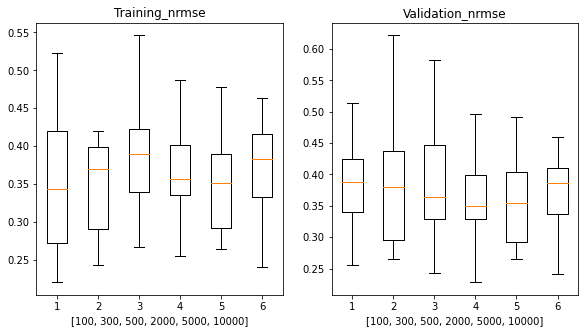

In [ ]:
a=[100,300,500,2000,5000,10000]                                            #These are the values which we are going to provide for the given variable 
w_0=2                                                                      #These will be the constants those will be same for all the samples
l=0.4
train_1=[]                                                                  #two empty arrays used for collecting the data to plot the graphs
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])                                                      #these are also empty arrays for collecting data at every number of samples
  for j in range(20):                                                        
    np.random.seed(j)                                                       #we use 20 random seeds for generating the 20 different types of data
    x=generate_x(i,7)                                                       #creating the matrix of i rows and 7 coloumns
    k=1
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)
    x_train=x[:int(3*i/4)]                                                  #we are divding the data matrix in the ratio of 3:1,so that 3/4th part for testing and 1/4th for validation 
    t_train=t[:int(3*i/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*i/4):]
    t_valid=t[int(3*i/4):]
    std_t_valid=t_valid.std()
    w_ml=pseudo_inverse(x_train,t_train,l)[0]                               #calculating the w_ml for the validation set
    mse_train=pseudo_inverse(x_train,t_train,l)[2]
    nrmse_train=np.sqrt(mse_train)/std_t_train
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)                                       #By using above w_ml we will calculate the y from which we calculate the nrmse 
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')                                                #we are plotting training nrmse with different number of samples 
plt.boxplot(train_1,showfliers=False)
plt.xlabel([100,300,500,2000,5000,10000])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')                                              #we are plotting validation nrmse with different number of samples 
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([100,300,500,2000,5000,10000])
plt.show()

Observations : As the data is completly random ,the nrmse is not following a pattern.

13b)We have to plot the boxplots for training and validation NRMSE obtained using pseudo inverse with number of variables.

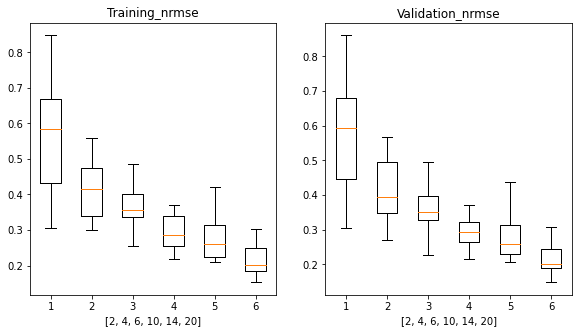

In [ ]:
a=[3,5,7,10,14,20]                  #Its is same as above the question just we have to change the varaibles
w_0=2
l=0.1
train_1=[]
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])
  for j in range(20):
    np.random.seed(j)
    x=generate_x(2000,i)                                                           #changing variable here
    k=1
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)
    x_train=x[:int(3*2000/4)]
    t_train=t[:int(3*2000/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*2000/4):]
    t_valid=t[int(3*2000/4):]
    std_t_valid=t_valid.std()
    w_ml=pseudo_inverse(x_train,t_train,l)[0]
    mse_train=pseudo_inverse(x_train,t_train,l)[2]
    nrmse_train=np.sqrt(mse_train)/std_t_train
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')
plt.boxplot(train_1,showfliers=False)
plt.xlabel([2,4,6,10,14,20])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([2,4,6,10,14,20])
plt.show()

observation : The median of nrmse is continously decreasing as we increase the number of features in both the graphas . So, according to my understanding I think by incorporting more features we can know more about the sytem. So less nrmse as we increase number of features

13c)We have to plot the boxplots for training and validation NRMSE obtained using pseudo inverse with noise varaiance.

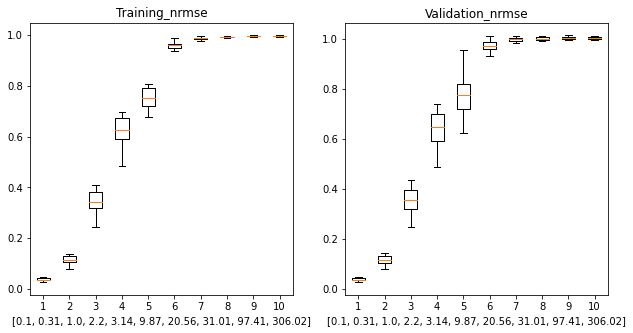

In [ ]:
a=[0.10, 0.31, 1.0,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02]    #Its is same as above the question just we have to change the changing varaible from features to noise varaince k
w_0=2
l=0.1
train_1=[]
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])
  for j in range(20):
    np.random.seed(j)
    x=generate_x(2000,9)
    k=i                                                                       #changing variable here
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)
    x_train=x[:int(3*2000/4)]
    t_train=t[:int(3*2000/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*2000/4):]
    t_valid=t[int(3*2000/4):]
    std_t_valid=t_valid.std()
    w_ml=pseudo_inverse(x_train,t_train,l)[0]
    mse_train=pseudo_inverse(x_train,t_train,l)[2]
    nrmse_train=np.sqrt(mse_train)/std_t_train
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(16,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')
plt.boxplot(train_1,showfliers=False)
plt.xlabel([0.10, 0.31, 1.0,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([0.10, 0.31, 1.0,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02])
plt.show()

Observation  : As the noise varaince is increasing intially nrmse got increased but after some value the nrmse got flatned 

13d)We have to plot the boxplots for training and validation NRMSE obtained using pseudo inverse with Bais w0.

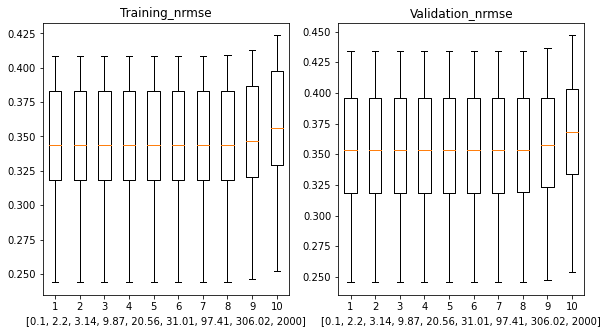

In [ ]:
a=[0.10,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02,2000,4000]    #Its is same as above the question just we have to change the varaibles from noise variance to w_0
l=0.1
train_1=[]
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])
  for j in range(20):
    np.random.seed(j)
    x=generate_x(2000,9)
    w_0=i                                                                  #changing variable here
    k=1
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)
    x_train=x[:int(3*2000/4)]
    t_train=t[:int(3*2000/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*2000/4):]
    t_valid=t[int(3*2000/4):]
    std_t_valid=t_valid.std()
    w_ml=pseudo_inverse(x_train,t_train,l)[0]
    mse_train=pseudo_inverse(x_train,t_train,l)[2]
    nrmse_train=np.sqrt(mse_train)/std_t_train
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')
plt.boxplot(train_1,showfliers=False)
plt.xlabel([0.10,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02,2000])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([0.10,2.2,3.14, 9.87,20.56, 31.01, 97.41, 306.02,2000])
plt.show()

Observation : The nrmse is almost constant, thee w_0 don,t have much effect on it

13d)We have to plot the boxplots for training and validation NRMSE obtained using pseudo inverse with lamda 2 .

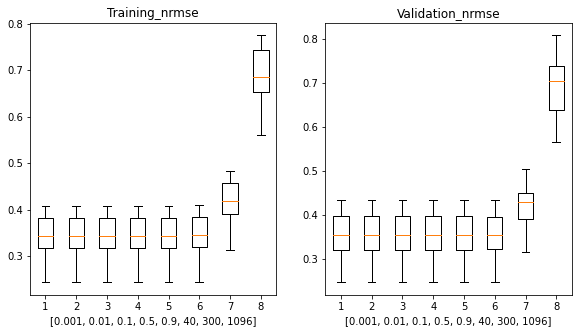

In [ ]:
a=[0.001,0.01,0.1,0.5,0.9,40,300,1096]           #Its is same as above the question just we have to change the varaibles
train_1=[]
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])
  for j in range(20):
    np.random.seed(j)
    x=generate_x(2000,9)
    w_0=3
    l=i                                                    #changing varaible
    k=1
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)
    x_train=x[:int(3*2000/4)]
    t_train=t[:int(3*2000/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*2000/4):]
    t_valid=t[int(3*2000/4):]
    std_t_valid=t_valid.std()
    w_ml=pseudo_inverse(x_train,t_train,l)[0]
    mse_train=pseudo_inverse(x_train,t_train,l)[2]
    nrmse_train=np.sqrt(mse_train)/std_t_train
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')
plt.boxplot(train_1,showfliers=False)
plt.xlabel([0.001,0.01,0.1,0.5,0.9,40,300,1096])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([0.001,0.01,0.1,0.5,0.9,40,300,1096])
plt.show()

Observation: the nrmse is almost constant with the lamda2 in tha range of 0-1, it starts slightly increasing when we go for higher values of lambda 2 

13g)Training and validation NRMSE obtained using gradient descent with max_iter

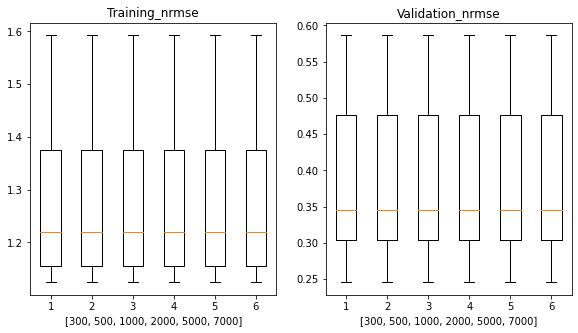

In [ ]:
a=[300,500,1000,2000,5000,7000]                                            #These are the values which we are going to provide for the given variable 
w_0=2                                                                      #These will be the constants those will be same for all the samples
l=0.4
n=0.0001
min_change=0.01
train_1=[]                                                                  #two empty arrays used for collecting the data to plot the graphs
valid_1=[]
for i in a:
  train_2=np.array([])
  valid_2=np.array([])                                                      #these are also empty arrays for collecting data at every number of samples
  for j in range(20):                                                        
    np.random.seed(j)                                                       #we use 20 random seeds for generating the 20 different types of data
    x=generate_x(1000,7)                                                       #creating the matrix of i rows and 7 coloumns
    k=1
    e=k*np.random.normal(0,1,size=(x.shape[0],1))
    w=np.random.normal(size=(x.shape[1]-1,1))
    t=generate_t(x,w,w_0,e)
    w=np.insert(w, 0, w_0, axis=0)                             
    x_train=x[:int(3*1000/4)]                                                  #we are divding the data matrix in the ratio of 3:1,so that 3/4th part for testing and 1/4th for validation 
    t_train=t[:int(3*1000/4)]
    std_t_train=t_train.std()
    x_valid=x[int(3*1000/4):]
    t_valid=t[int(3*1000/4):]
    std_t_valid=t_valid.std()
    w_ml=grad_descent(x_train,t_train,n,i,min_change)[0]                        #calculating the w_ml for the validation set
    nrmse_train=grad_descent(x_train,t_train,n,i,min_change)[1]
    train_2=np.append(train_2,nrmse_train)
    y_valid=estimated_y(x_valid,w_ml)                                       #By using above w_ml we will calculate the y from which we calculate the nrmse 
    mse_valid=mse_cal(y_valid,t_valid)
    nrmse_valid=np.sqrt(mse_valid)/std_t_valid
    valid_2=np.append(valid_2,nrmse_valid)
  train_1.append(train_2)
  valid_1.append(valid_2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
plt.title('Training_nrmse')                                                #we are plotting training nrmse with different number of samples 
plt.boxplot(train_1,showfliers=False)
plt.xlabel([300,500,1000,2000,5000,7000])
plt.subplot(1,3,3)
plt.title('Validation_nrmse')                                              #we are plotting validation nrmse with different number of samples 
plt.boxplot(valid_1,showfliers=False)
plt.xlabel([300,500,1000,2000,5000,7000])
plt.show()

Observations : initially increases and after that nrmse didnt have much change with max_iter values after a certain limit

In the following one we are going to find the breaking point for number of samples using psuedo inverse matrix method

<function matplotlib.pyplot.show(*args, **kw)>

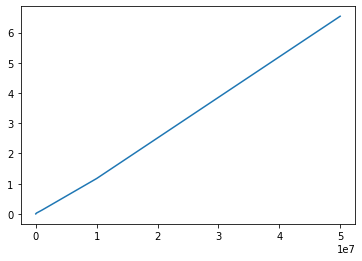

In [ ]:
samples=[1000,10000,100000,1000000,10000000,50000000] #array for number of samples in multiple experiments
t_samples=[]
for i in samples:
  t=0
  x=generate_x(i,9)
  w_0=3
  l=0.4
  k=1
  e=k*np.random.normal(0,1,size=(x.shape[0],1))
  w=np.random.normal(size=(x.shape[1]-1,1))                #initailising the varaibles
  t=generate_t(x,w,w_0,e)
  w=np.insert(w, 0, w_0, axis=0)
  start = timer()                                           #start of timer
  w_ml,y,mse=pseudo_inverse(x,t,l)
  end = timer()                                             #end of the timer
  t=end - start
  t_samples.append(t)
plt.plot(samples,t_samples)
plt.show                                     # breaking point =5.5*10^7

Breaking point for number of samples = 5.5*10^7

In the following one we are going to find the breaking point for number of features using psuedo inverse matrix method

In [ ]:
samples=[2,10 ,20, 200, 500,1000,2000,3000,5000,12000]      #array for number of samples in multiple experiments
t_samples=[]
for i in samples:
  t=0
  x=generate_x(1000,i)
  w_0=3
  l=0.4
  k=1
  e=k*np.random.normal(0,1,size=(x.shape[0],1))
  w=np.random.normal(size=(x.shape[1]-1,1))                
  t=generate_t(x,w,w_0,e)                                            #initailising the varaibles
  w=np.insert(w, 0, w_0, axis=0)
  start = timer()                                                     #start of timer
  w_ml,y,mse=pseudo_inverse(x,t,l)
  end = timer()                                                       #end of the timer
  t=end - start
  t_samples.append(t)
plt.plot(samples,t_samples)
plt.show

Breaking point for number of features =12500

14). Write your overall learning points by doing the entire assignment
- Implementation of the linear regression model from scratch.
-How each and every parameter will affect the nrmse of the output 
- How easy is to use the box plots to represent data when we have a continous distribution 
-How to analyze the given data and draw the conclusions 